## 1. Личный оптимальный портфель

Мы решили построить безросковый оптимальный портфель. Для этого нам потребовалось вычеслить безрисковую ставку, т.е. процент доходности, который можно получить при инвестировании в активы с нулевым риском.

Реальная безрисковая ставка учитывающая уровень инфляции рассчитывается по формуле:
Rf = Rn + I + Rn*I, 
где
Rn - номинальная безрисковая ставка
I – темп инфляции.

Для Германии:
Rn=0%, I=1.2% (данные с https://ru.tradingeconomics.com/germany). Рассчитанм безрисковую ставку ниже.

In [2]:
Rn=0
I=0.012
risk_free_rate = Rn+I+Rn*I

In [3]:
import cvxopt as opt
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import statistics as stat
import matplotlib.pyplot as plt
import importlib
import seaborn as sns; sns.set()
import finance_scripts as fs
import quandl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
importlib.reload(fs)

<module 'finance_scripts' from 'C:\\Users\\Ирина\\Finance\\finance_scripts.py'>

In [5]:
fs.init()

[**                     4%                       ]  4 of 91 downloaded

Exception in thread Thread-13:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('SPR.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")

Exception in thread Thread-9:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstr

[****                   8%                       ]  7 of 91 downloaded

Exception in thread Thread-15:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('KU2.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[*****                 11%                       ]  10 of 91 downloaded

Exception in thread Thread-18:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 363, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 208, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _do

[**********            21%                       ]  19 of 91 downloaded

Exception in thread Thread-30:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 363, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 208, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _do

[***********           23%                       ]  21 of 91 downloaded

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

[************          26%                       ]  24 of 91 downloaded

Exception in thread Thread-38:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('UTDI.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[***************       31%                       ]  28 of 91 downloaded

Exception in thread Thread-46:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('ADV.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[*******************   40%                       ]  36 of 91 downloaded

Exception in thread Thread-48:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 363, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 208, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _do

[**********************51%                       ]  46 of 91 downloaded

Exception in thread Thread-63:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('AIR.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[**********************53%                       ]  48 of 91 downloaded

Exception in thread Thread-70:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('EVD.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[**********************59%***                    ]  54 of 91 downloaded

Exception in thread Thread-72:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('FRE.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")

Exception in thread Thread-68:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootst

[**********************67%*******                ]  61 of 91 downloaded

Exception in thread Thread-79:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('EOAN.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[**********************69%********               ]  63 of 91 downloaded

Exception in thread Thread-87:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('ARL.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[**********************75%***********            ]  68 of 91 downloaded

Exception in thread Thread-95:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "D:\Anaconda3\lib\site-packages\yfinance\__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('BC8.DE', "Data doesn't exist for startDate = 1483218000, endDate = 1514754000")



[*********************100%***********************]  72 of 91 downloaded


In [6]:
dClosed = pd.read_pickle("close_cleared.pickle") #  цены закрытия
dVolume = pd.read_pickle("volume_cleared.pickle") #  объёмы продаж
print(dClosed.shape[1]) # Число исследуемых компаний

72


In [7]:
logR = np.log(dClosed / dClosed.shift(1))
e = datetime.strptime('2017-01-02', '%Y-%m-%d')
logR = logR.drop(e)

In [8]:
portfolio_stocks =['TTK.DE','MLP.DE','CON.DE','ALV.DE','ADS.DE','HOT.DE','BAS.DE','BAYN.DE','BEI.DE','BMW.DE','CBK.DE','CON.DE','DAI.DE','DB1.DE','DBK.DE','DPW.DE','DTE.DE','FME.DE','HEI.DE','HEN3.DE','IFX.DE','LHA.DE','LIN.DE','MRK.DE','MUV2.DE','RWE.DE','SAP.DE','SIE.DE','TKA.DE','BOSS.DE','DEQ.DE','DUE.DE','FIE.DE','FRA.DE','G1A.DE','GBF.DE','HNR1.DE','DEZ.DE','HOT.DE','KRN.DE','LEO.DE','LXS.DE','MAN.DE','NDA.DE','RHK.DE','MOR.DE','NEM.DE','PFV.DE','BOSS.DE','DEQ.DE']
portfolio_R=logR[portfolio_stocks]

#### С запретом коротких продаж.

In [9]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *255
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(255)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(50)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [10]:
mean_returns = portfolio_R.mean()
cov_matrix = portfolio_R.cov()
num_portfolios = 100000

In [11]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=portfolio_R.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=portfolio_R.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.24
Annualised Volatility: 0.11


            TTK.DE  MLP.DE  CON.DE  ALV.DE  ADS.DE  HOT.DE  BAS.DE  BAYN.DE  \
allocation    0.62     3.8    2.35    0.03    1.15    0.62    0.65     0.13   

            BEI.DE  BMW.DE  ...  LEO.DE  LXS.DE  MAN.DE  NDA.DE  RHK.DE  \
allocation    3.99     0.9  ...    4.86    0.31    3.76    4.14     0.7   

            MOR.DE  NEM.DE  PFV.DE  BOSS.DE  DEQ.DE  
allocation    4.08     4.8    1.96     0.47    0.09  

[1 rows x 50 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.14
Annualised Volatility: 0.09


            TTK.DE  MLP.DE  CON.DE  ALV.DE  ADS.DE  HOT.DE  BAS.DE  BAYN.DE  \
allocation    1.71    0.42    4.22    4.07    1.24    1.78    2.58     3.26   

            BEI.DE  BMW.DE  ...  LEO.DE  LXS.D

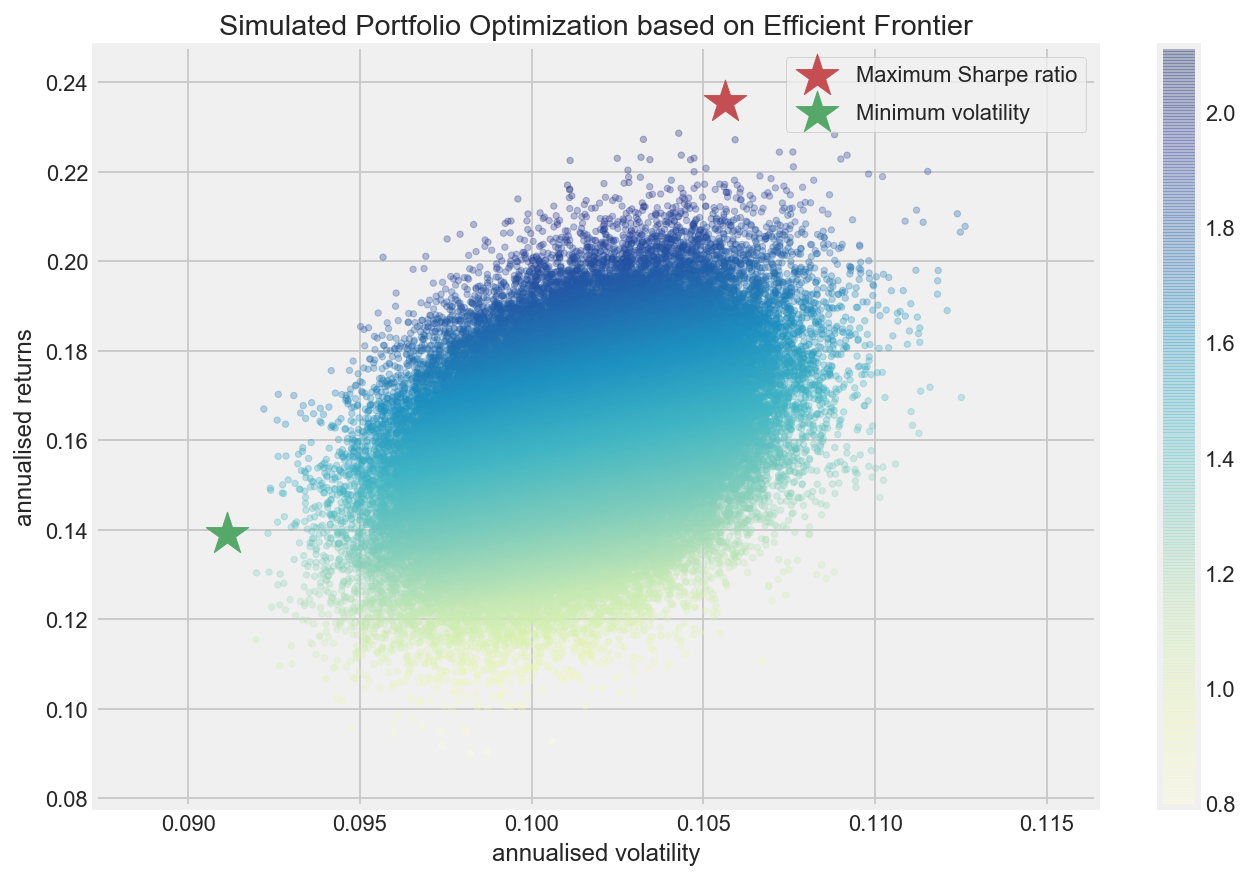

In [12]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Для анализа результатов мы строили по 100000 портфелей. Для портфель с максимальным коэффициентом Шарпа веса активов изменяются в диапазоне от 0.13 (BAYER) до 4.96 (SAP). Стоит заметит, доходность данного портфеля 0.24 при риске 0.11. Если рассматривать портфель с миниальным риском, то веса колеблются в промежутке от 0.03 (FME) до 4.33 (MAN). Для этого портфеля доходность равна 0.14 при риске 0.09. Портфель, построенный при помощи коэффициента Шарпа, является более эффективным на наш взгляд, его риск выше всего на 0.02, однако доходность возрастает на 0.1, что оправдывает риск.
Если сравнивать данные портфели по весам, то портфель, который мы выбрали лушчим, также имеет достаточно большой (для полученного результата) вклад активов MAN (3.76), активы FME имеют средний по величине вес вложений (1.89).

In [13]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [14]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [15]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [16]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=portfolio_R.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=portfolio_R.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    pd.options.display.max_columns = 300
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.6, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.58
Annualised Volatility: 0.13


            TTK.DE  MLP.DE  CON.DE  ALV.DE  ADS.DE  HOT.DE  BAS.DE  BAYN.DE  \
allocation     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0   

            BEI.DE  BMW.DE  CBK.DE  CON.DE  DAI.DE  DB1.DE  DBK.DE  DPW.DE  \
allocation     0.0     0.0    3.21     0.0     0.0    6.79     0.0     0.0   

            DTE.DE  FME.DE  HEI.DE  HEN3.DE  IFX.DE  LHA.DE  LIN.DE  MRK.DE  \
allocation     0.0     0.0     0.0      0.0     0.0   27.07     0.0     0.0   

            MUV2.DE  RWE.DE  SAP.DE  SIE.DE  TKA.DE  BOSS.DE  DEQ.DE  DUE.DE  \
allocation      0.0    0.06     0.0     0.0     0.0     0.57     0.0     0.0   

            FIE.DE  FRA.DE  G1A.DE  GBF.DE  HNR1.DE  DEZ.DE  HOT.DE  KRN.DE  \
allocation     0.0   27.33     0.0     0.0      0.0     0.0     0.0    1.11   

            LEO.DE  LXS.DE 

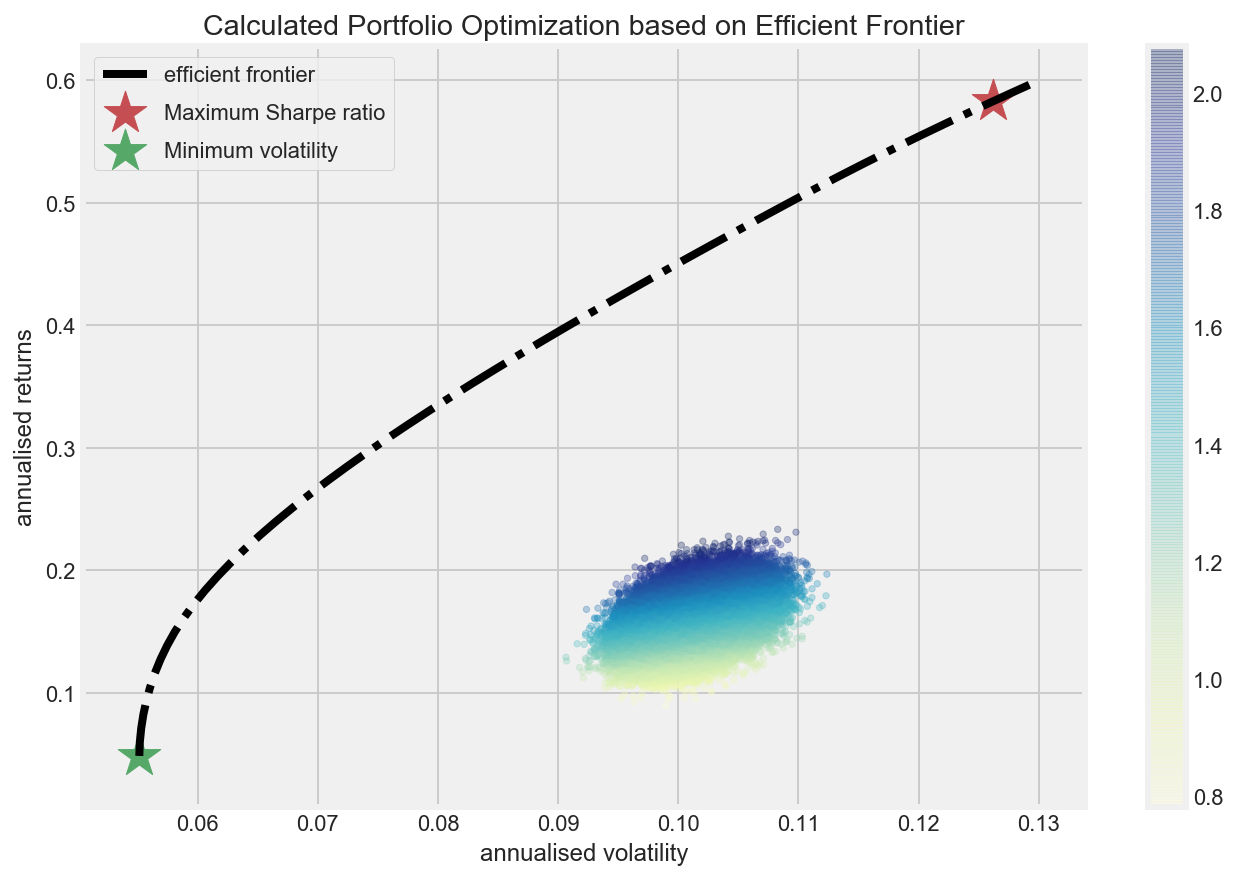

In [17]:

display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Далее мы построили эффектиную границу и 100000 случайных портфелей. В этом случае, выбор оптимального портфеля происходил не из случайно построенных,а с учетом функции минимизации (минимизмруем риск). Портфель с макимальным коэффициентом Шарпа имеет доходность 0.58 при риске 0.13. Если смотреть на веса активов участвующие в его построении, то масимальный вес имеет аэропорт Франкфурт 27.33, чуть меньший вес (27.09) имеет авиаперевозчик Германии "Lufthansa", третье место заимает Pfeiffer Vacuum Technology с весом 24.81. В данном случае, картина распределения активов совершенно другая, если при распределении весов случайным образом все акции учавствовали а формировании портфеля, но с маленьким весом, то тут основная часть портфеля формируется из акций трех участников рынка, некоторые акции фходят в портфель с маленькими весами или не присутствует в портфеле вовсе. При минимизации риска, больше половины (65.89) портфеля составляют акции MAN. Доходность этого портфеля 0.05 при риске 0.06, конечно, риск мал, но и доходность этого портфеля очень маленькая. Интересно, что минимизации в обоих случаях больший вес имели акции MAN.

Выбирая из четырех вариантов, мы сделали выбор в пользу третьего портфеля с риском 0.13 и доходностью 0.58. На наш взгляд, риск этого портфеля может быть оправданан доходностью и лишь на 0.01 его риск выше безрисковой ставки.

#### С короткими продажами.

При разрешении коротких продаж коэффициенты меняются в диапазоне от -1 до 1. Построим портфели с учетом этого изменения.

In [18]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-1.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [19]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-1.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [20]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [21]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=portfolio_R.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=portfolio_R.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    pd.options.display.max_columns = 300
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(-1, 3, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.48
Annualised Volatility: 0.3


            TTK.DE  MLP.DE  CON.DE  ALV.DE  ADS.DE  HOT.DE  BAS.DE  BAYN.DE  \
allocation  -20.24   12.75   14.24   96.78  -13.57    -5.7  -30.63    -3.88   

            BEI.DE  BMW.DE  CBK.DE  CON.DE  DAI.DE  DB1.DE  DBK.DE  DPW.DE  \
allocation   76.65  -51.26   21.81   14.24   -4.64   56.32   -9.08   28.55   

            DTE.DE  FME.DE  HEI.DE  HEN3.DE  IFX.DE  LHA.DE  LIN.DE  MRK.DE  \
allocation  -67.15   -1.86    -0.3   -100.0   -3.23   52.22   -2.75  -38.01   

            MUV2.DE  RWE.DE  SAP.DE  SIE.DE  TKA.DE  BOSS.DE  DEQ.DE  DUE.DE  \
allocation   -65.56    7.13   28.15  -49.72   -4.84     8.61  -32.53    1.23   

            FIE.DE  FRA.DE  G1A.DE  GBF.DE  HNR1.DE  DEZ.DE  HOT.DE  KRN.DE  \
allocation   24.56   75.01   -1.83  -30.86   -20.72   -1.78    -5.7   17.72   

            LEO.DE  LXS.DE  

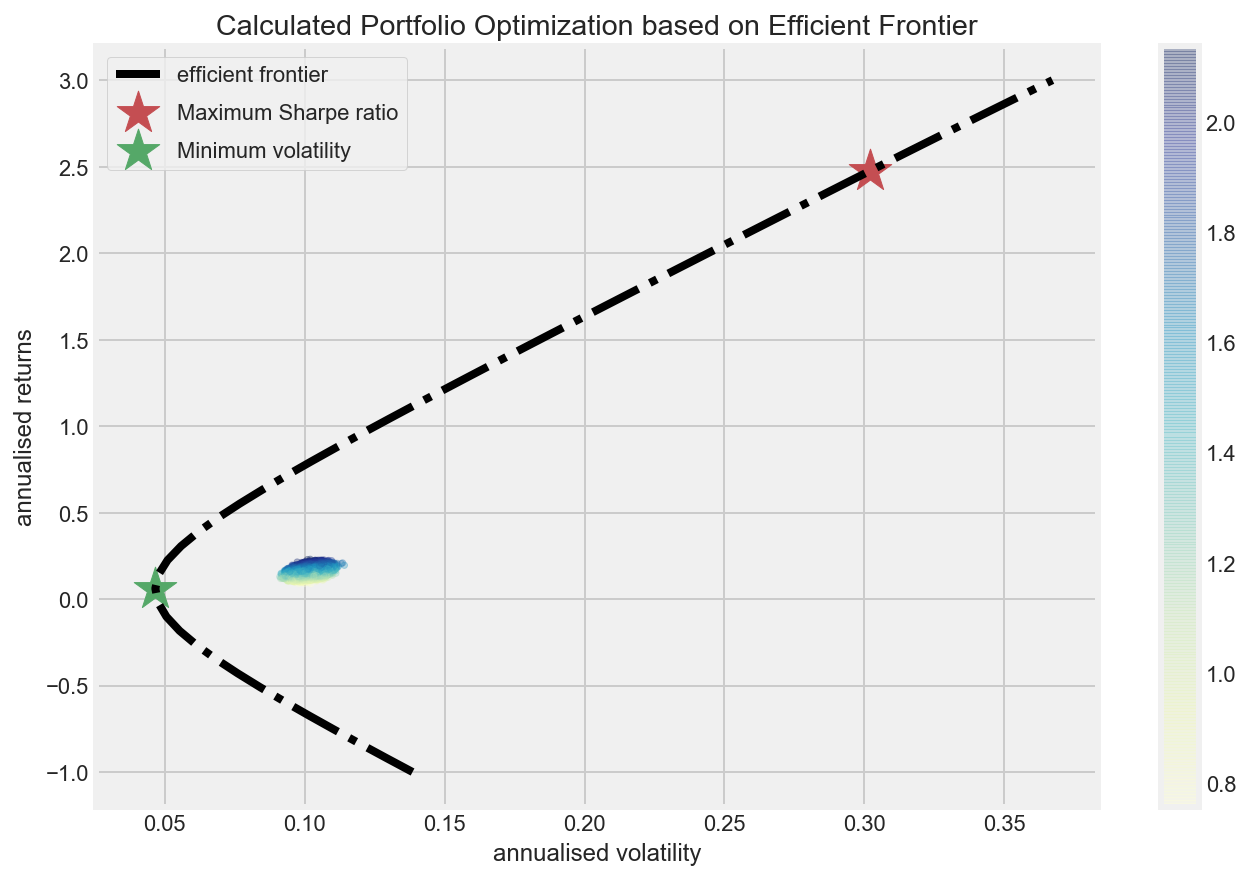

In [22]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

При разрешении коротких продаж доходность портфеля, который построен при помощи коэффициента Шарпа, возрасла до 2.47, а риск уменьшился до 0.3. Эти показатели намного лучше показателей портфеля с запретом коротких продаж. Если же сравнивать второй построенный портфель с аналогичным, но имеющем запрет на короткие продажи портфелем, то его покзатели изменились незначительно, но в лучшую сторону, риск упал на 0.1, а доходность увеличилась на 0.1. В обоих вариантоах веса акций изменились, что легко объяснимо разрешением на короткие продажи. 
В этом варианте мы также выбрали портфель, который построен при помощи коэффициента Шарпа. Его доходность в разы больше, а риск меньше.

## 2. Выбор оптимального портфеля из 10 акций

Для второго задания мы выбрали 10 активов, который вносят больший вклад в построение оптимального портфеля с запретом коротких продаж в пункте 1. Отношение к риску мы оставили без изменений.

In [23]:
portfolio_stocks =['FRA.DE','LHA.DE','PFV.DE','DB1.DE','RHK.DE','CBK.DE','LEO.DE','MOR.DE','KRN.DE','NEM.DE']
portfolio_R=logR[portfolio_stocks]

#### С запретом на короткие продажи.

In [24]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *255
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(255)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [25]:
mean_returns = portfolio_R.mean()
cov_matrix = portfolio_R.cov()
num_portfolios = 100000

In [26]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [27]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [28]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [29]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=portfolio_R.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=portfolio_R.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    pd.options.display.max_columns = 300
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.6, 10)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.59
Annualised Volatility: 0.13


            FRA.DE  LHA.DE  PFV.DE  DB1.DE  RHK.DE  CBK.DE  LEO.DE  MOR.DE  \
allocation   27.44   27.38   24.87    6.89    3.44    3.21    2.26    2.25   

            KRN.DE  NEM.DE  
allocation    1.22    1.04  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.32
Annualised Volatility: 0.09


            FRA.DE  LHA.DE  PFV.DE  DB1.DE  RHK.DE  CBK.DE  LEO.DE  MOR.DE  \
allocation   15.25    5.31   10.97   19.86   35.97    3.67     0.0     0.0   

            KRN.DE  NEM.DE  
allocation    7.21    1.77  


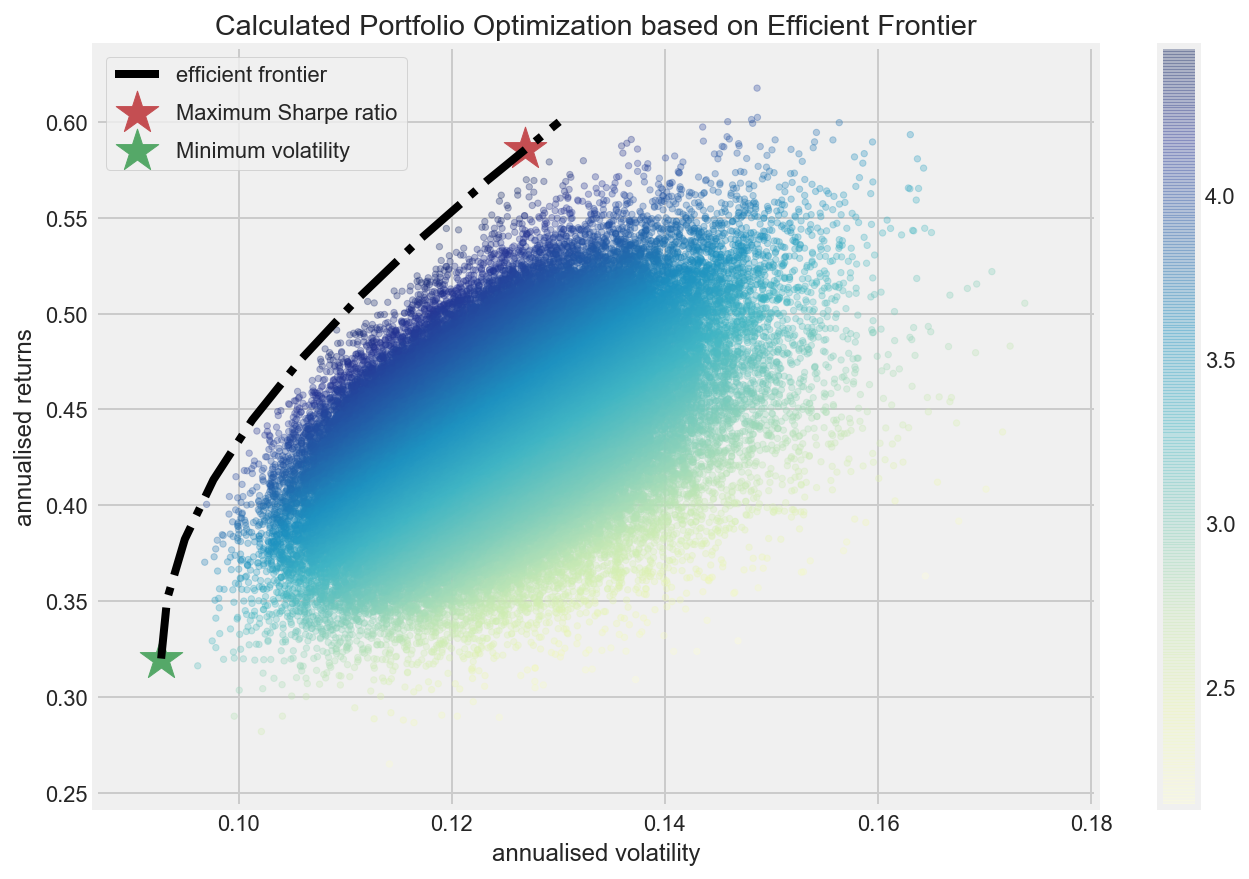

In [30]:

display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Для данной задачи мы также решили посмотрть результаты при оптимизации коэффициентом Шарпа и при минимизации риска. Для варианта с подсчетом коэффициента Шарпа доходность портфеля 0.59 при риске 0.13. В данном портфеле также имеется три крупных актива, которые составляют большую часть портфеля, это аэропорт Франкфурт (27.44), Deutsche Lufthansa (27.41) и Pfeiffer Vacuum Technology (24.88). Веса этого портфеля примерно равны весам аналогисного портфля с 50 активами, что логично, активы мы выбирали по этому портфелю, однако, мы получили небольшой прирост доходности на 0.01 при неизменном риске, таким образом, мы улучшили портфель простым сокращением числа активов. Если смотреть на результаты, которые получились при момощи минимизации риска, то доходность в этом случае 0.32, а риск 0.09. Эти показатели намного лучше, чем в предыдущем варианте с 50 активами, доходность увеличилась на 0.27, а риск лишь на 0.03. Веса активов тоже изменились, больше трети занимают активы RH?N-KLINIKUM Aktiengesellschaft (35.98), второе место по вложению занимают активы Deutsche Borse (19.85), третье - аэропорт Франкфурт (15.25). 
Если сравнивать между этими портфелями, то мы выбрали первый, с доходность 0.59 и риском 0.13.

#### С короткими продажами.

In [31]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-1.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [32]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-1.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [33]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [34]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=portfolio_R.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=portfolio_R.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    pd.options.display.max_columns = 300
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(-0.5, 1, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.59
Annualised Volatility: 0.13


            FRA.DE  LHA.DE  PFV.DE  DB1.DE  RHK.DE  CBK.DE  LEO.DE  MOR.DE  \
allocation   27.44   27.37   24.86     6.9    3.44    3.21    2.27    2.25   

            KRN.DE  NEM.DE  
allocation    1.22    1.04  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.32
Annualised Volatility: 0.09


            FRA.DE  LHA.DE  PFV.DE  DB1.DE  RHK.DE  CBK.DE  LEO.DE  MOR.DE  \
allocation   15.31    5.71   11.43   20.08   36.36    3.96   -2.23   -0.42   

            KRN.DE  NEM.DE  
allocation    7.62    2.19  


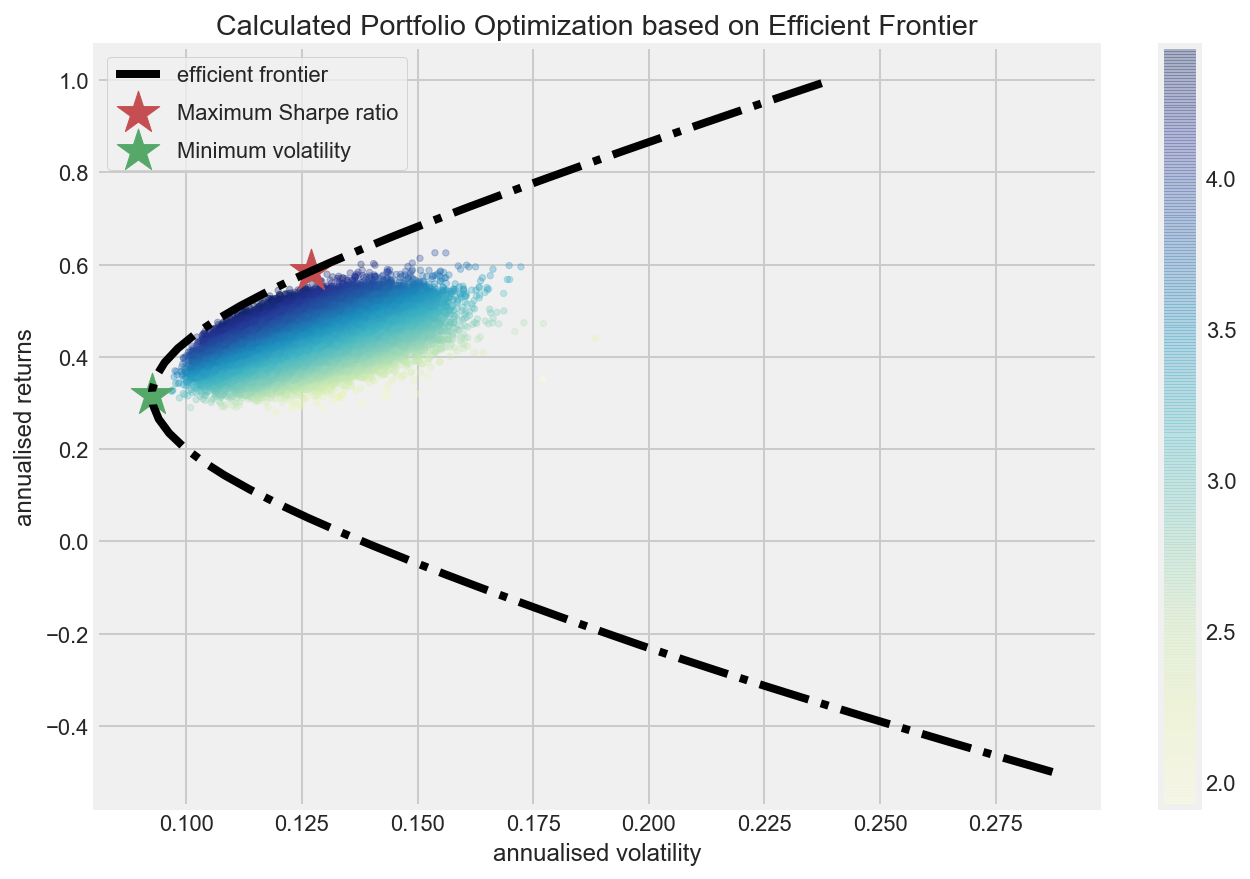

In [35]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Если разрешить короткие продажи, то резкльтаты, которые получились коэффициентом Шарпа не отличаются от показателей с запретом на короткие продажи, единственное изменение в весах активов из показатели отличаются в этих двух случаях на сотые. Доходность и риск второго портфеля также не изменились, но заметные изменения произошли в расстановке весов. Больше трети также занимают активы RH?N-KLINIKUM Aktiengesellschaft (36.38), второе место Deutsche Borse (20.08), третье место - аэропорт Франкфурт (15.31). В данном варианте появились отрицательные веса, что сведетельствует о наличии коротких продаж, но их наличие не улучшило показатели портфеля. В данном случае мы также выбрали первый вариант портфеля.

In [115]:
from cvxopt import blas, solvers 

In [116]:
def rand_weights(n):  
        ''' Produces n random weights that sum to 1 '''  
        k = np.random.rand(n)  
        return k / sum(k)

In [117]:
portfolio_num = 10
portfolio_stocks = logR.columns[:portfolio_num]
portfolio_R=logR[portfolio_stocks]

In [118]:
print(rand_weights(portfolio_num))

[0.15689614 0.16813157 0.00437187 0.21062881 0.08927629 0.05351391
 0.12315448 0.01731237 0.11163741 0.06507716]


In [119]:
def random_portfolio(portfolio_R):  
    '''  
    Returns the mean and standard deviation of returns for a random portfolio  
    '''

    p = np.asmatrix(np.mean(portfolio_R, axis=0))  
    w = np.asmatrix(rand_weights(portfolio_R.shape[1]))  
    C = np.asmatrix(np.cov(portfolio_R.values.T))  
    mu = w * p.T  
    sigma = np.sqrt(w * C * w.T)  
    # This recursion reduces outliers to keep plots pretty  
#     if sigma > 2:  
#         return random_portfolio(returns)  
    return mu, sigma  

In [120]:
mu, sigma = random_portfolio(portfolio_R)
print(f'mu = {mu}, sigma = {sigma}')

mu = [[0.00046166]], sigma = [[0.00655813]]


In [121]:
n_portfolios = 10000
means, stds = np.column_stack([  
    random_portfolio(portfolio_R) for _ in range(n_portfolios)
])

In [122]:
def optimal_portfolio(portfolio_R):  
    n = portfolio_R.shape[1]
    returns = portfolio_R.values.T
    N = 100  
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]  
    # Convert to cvxopt matrices  
    S = opt.matrix(np.cov(returns))  
    pbar = opt.matrix(np.mean(returns, axis=1))  
    # Create constraint matrices  
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix  
    h = opt.matrix(0.0, (n ,1))  
    A = opt.matrix(1.0, (1, n))  
    b = opt.matrix(1.0)  
    # Calculate efficient frontier weights using quadratic programming  
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']  
                  for mu in mus]  
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER  
    returns = [blas.dot(pbar, x) for x in portfolios]  
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]  
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE  
    m1 = np.polyfit(returns, risks, 2)  
    x1 = np.sqrt(m1[2] / m1[0])  
    # CALCULATE THE OPTIMAL PORTFOLIO  
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']  
    return np.asarray(wt), returns, risks

     pcost       dcost       gap    pres   dres
 0: -4.8965e-04 -1.0014e+00  1e+00  8e-17  3e+00
 1: -4.9002e-04 -1.1449e-02  1e-02  8e-17  4e-02
 2: -5.2228e-04 -1.5490e-03  1e-03  6e-17  4e-03
 3: -1.3149e-03 -2.0852e-03  8e-04  6e-16  2e-03
 4: -1.4252e-03 -1.4506e-03  3e-05  3e-16  6e-05
 5: -1.4440e-03 -1.4442e-03  3e-07  8e-17  6e-07
 6: -1.4442e-03 -1.4442e-03  3e-09  3e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.8940e-04 -1.0014e+00  1e+00  6e-17  3e+00
 1: -4.8977e-04 -1.1449e-02  1e-02  1e-16  4e-02
 2: -5.2203e-04 -1.5487e-03  1e-03  1e-16  4e-03
 3: -1.3146e-03 -2.0849e-03  8e-04  2e-16  2e-03
 4: -1.4243e-03 -1.4497e-03  3e-05  1e-16  6e-05
 5: -1.4431e-03 -1.4433e-03  3e-07  2e-16  6e-07
 6: -1.4433e-03 -1.4433e-03  3e-09  1e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.8912e-04 -1.0014e+00  1e+00  2e-16  3e+00
 1: -4.8949e-04 -1.1449e-02  1e-02  1e-16  4e-02
 2: -5.2175e-04 -1.5483e

 2:  1.4615e-03  3.8595e-04  1e-03  1e-16  4e-03
 3:  1.2395e-03  1.0181e-03  2e-04  1e-16  2e-18
 4:  1.2044e-03  1.1878e-03  2e-05  6e-17  1e-18
 5:  1.1989e-03  1.1978e-03  1e-06  7e-17  1e-18
 6:  1.1983e-03  1.1982e-03  8e-08  1e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7914e-03 -9.9956e-01  1e+00  2e-16  3e+00
 1:  1.7899e-03 -9.5540e-03  1e-02  9e-17  4e-02
 2:  1.6972e-03  5.4511e-04  1e-03  1e-16  4e-03
 3:  1.4723e-03  1.2437e-03  2e-04  8e-17  2e-18
 4:  1.4379e-03  1.4215e-03  2e-05  7e-17  2e-18
 5:  1.4325e-03  1.4312e-03  1e-06  4e-17  1e-18
 6:  1.4318e-03  1.4317e-03  1e-07  7e-17  1e-18
 7:  1.4317e-03  1.4317e-03  7e-09  7e-17  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0690e-03 -9.9942e-01  1e+00  8e-17  3e+00
 1:  2.0671e-03 -9.4116e-03  1e-02  1e-16  4e-02
 2:  1.9606e-03  7.2623e-04  1e-03  8e-17  4e-03
 3:  1.7311e-03  1.4958e-03  2e-04  7e-17  2e-18
 4:  1.6973e-03  1.6811

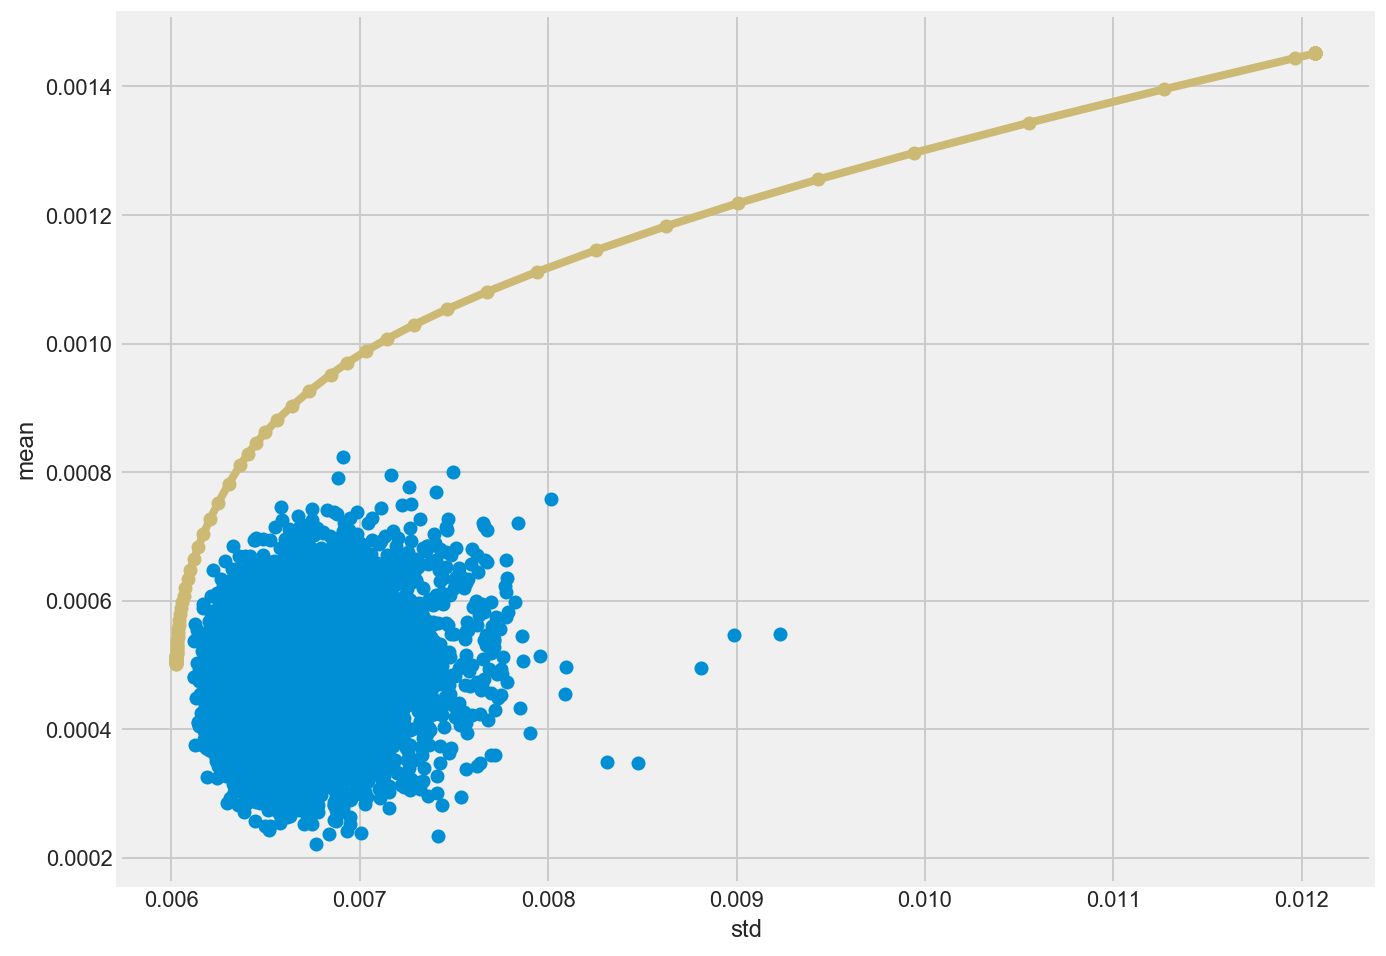

In [123]:
weights, returns, risks = optimal_portfolio(portfolio_R)

plt.plot(stds, means, 'o')  
plt.ylabel('mean')  
plt.xlabel('std')  
plt.plot(risks, returns, 'y-o')  

## 3. Безрисковый актив

Мы решили выбрать безрисковый актив через стандартное отклонение. Стандартное отклонение говорит о величине и вероятности отклонения доходности актива от ее средней величины за определенный период времени. Получается, нас интересует актив с наименьшим стандартным отклонением.

Строим оценки, исходя из формул:
 $$\widehat{E}_i = 1/n \sum{R_i(t)}$$
 $$  \widehat{\sigma}^2_i = 1/n \sum {(R_i(t) - \widehat{E}_i)}^2 $$



In [62]:
import statistics
portfolio_stocks =['FRA.DE','LHA.DE','PFV.DE','DB1.DE','RHK.DE','CBK.DE','LEO.DE','MOR.DE','KRN.DE','NEM.DE']
portfolio_R=logR[portfolio_stocks]

In [63]:
E=[]
for i in (portfolio_stocks):
    E.append(statistics.mean(logR[i][1:]))

In [64]:
StDev=[]
for i in (portfolio_stocks):
    StDev.append(statistics.stdev(logR[i][1:]))

In [65]:
print(min(StDev))

0.008571401365324582


In [93]:
for i in range(0,len(portfolio_stocks)):
    if (StDev[i]==min(StDev)):
        risk_free_ass=portfolio_stocks[i]
        risk_free_n=i
print(risk_free_st)

RHK.DE


В качестве безрискового актива мы выбрали актив Rhön-Klinikum.

Карта активов в системе координат  (𝜎,𝐸). Красной точкой выделен выбранный нами актив.

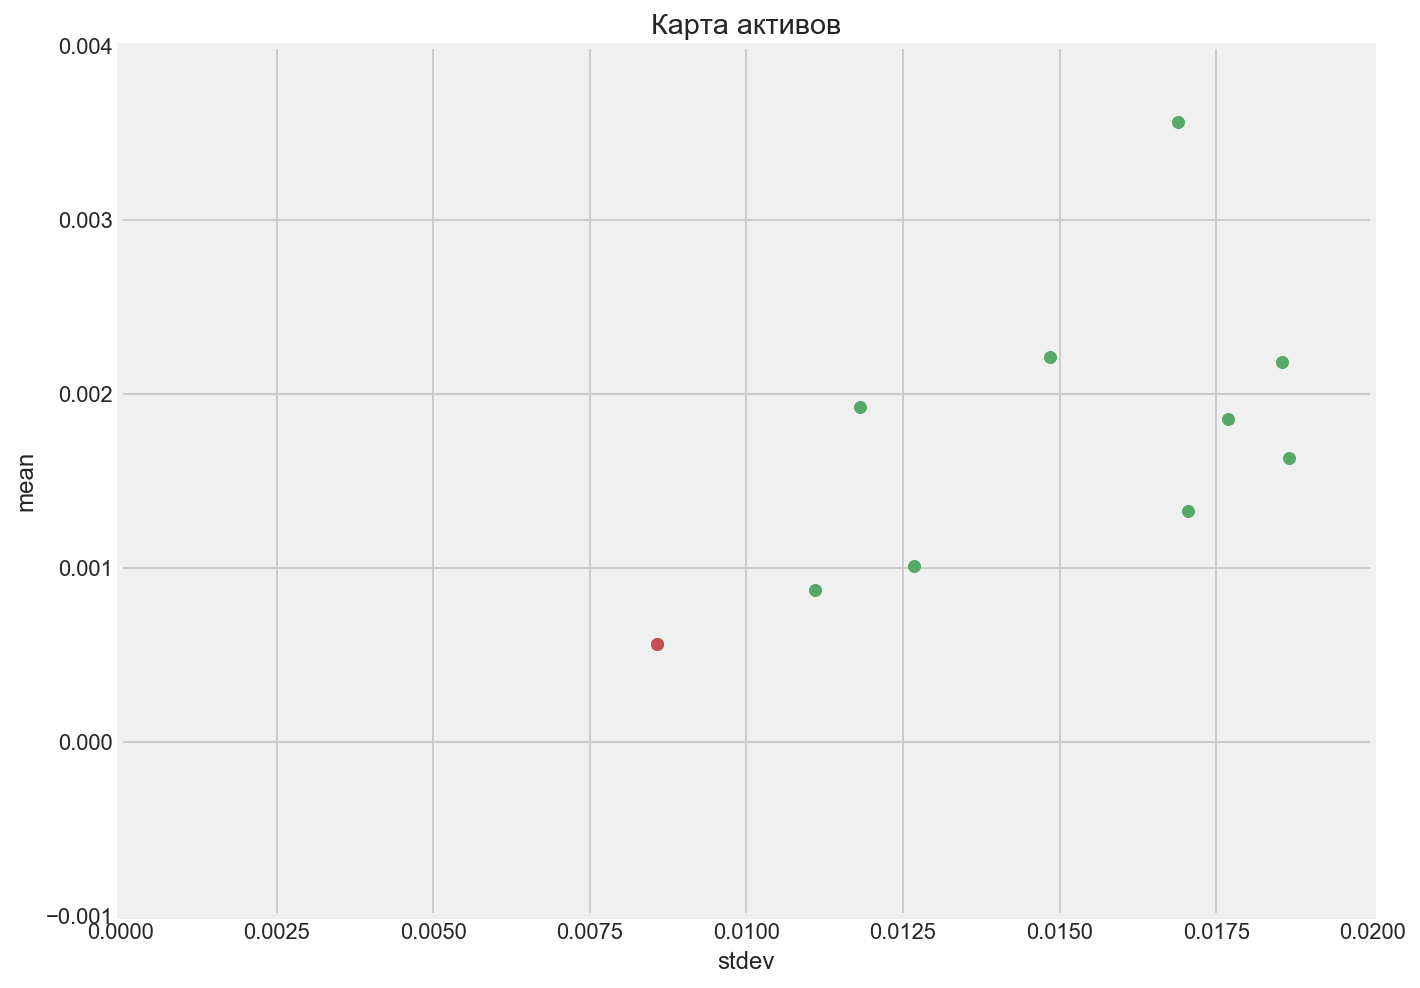

In [94]:
plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(StDev,E,c='g', alpha=1)
plt.scatter(StDev[risk_free_n],E[risk_free_n],c='r', alpha=1)
plt.title("Карта активов")
plt.xlabel("stdev")
plt.ylabel("mean")
plt.xlim(0,0.02)
plt.ylim(-0.001, 0.004)
plt.show()
plt.rcParams["figure.figsize"] = (10,8)

In [162]:
x = risks
y= returns

# calculate polynomial
z = np.polyfit(x, y, 3) 
f = np.poly1d(z) 

In [163]:
print(z)

[ 1.45759103e+04 -4.23298904e+02  4.09651955e+00 -1.19537209e-02]


In [164]:
print(f)

           3         2
1.458e+04 x - 423.3 x + 4.097 x - 0.01195


In [165]:
diff(f)

array([-1.49992092e+04,  4.27395423e+02, -4.10847327e+00])

In [167]:
StE=sum(E)/len(portfolio_stocks)

In [169]:
Dev=sum(StDev)/len(portfolio_stocks)

Найдем угол наклоня линии рынка капитала по формуле:


In [179]:
theta=(StE-E[risk_free_n])/Dev

In [180]:
print(theta)

0.07785443256553236
